In [43]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
data = pd.read_csv(r"C:/Users/beomgyu2/AI_CLASS/BP_data.csv")
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


C:\Users\beomgyu2\AppData\Local\Temp\ipykernel_6628\250776439.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Blood_Pressure_Abnormality', data=data, ci=None)


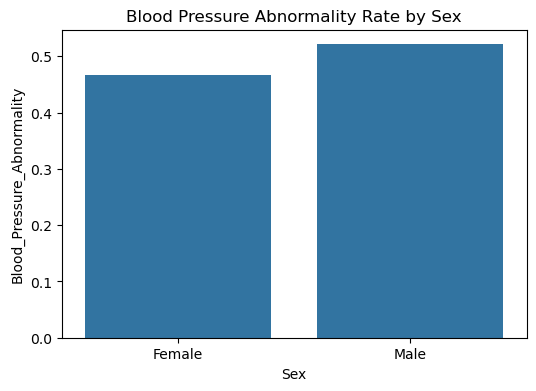

In [159]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Blood_Pressure_Abnormality', data=data, ci=None)
plt.title('Blood Pressure Abnormality Rate by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

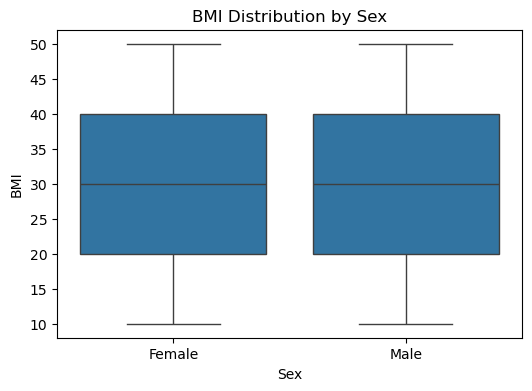

In [55]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='BMI', data=data)
plt.title('BMI Distribution by Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

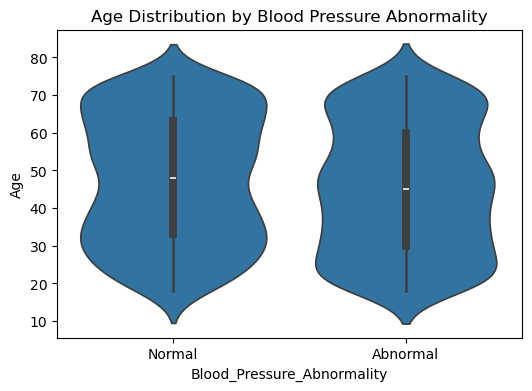

In [57]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Blood_Pressure_Abnormality', y='Age', data=data)
plt.title('Age Distribution by Blood Pressure Abnormality')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()

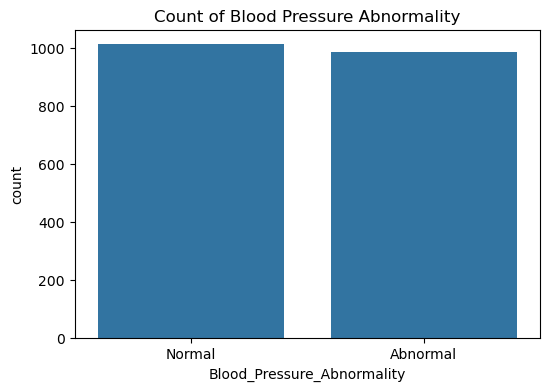

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x='Blood_Pressure_Abnormality', data=data)
plt.title('Count of Blood Pressure Abnormality')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()

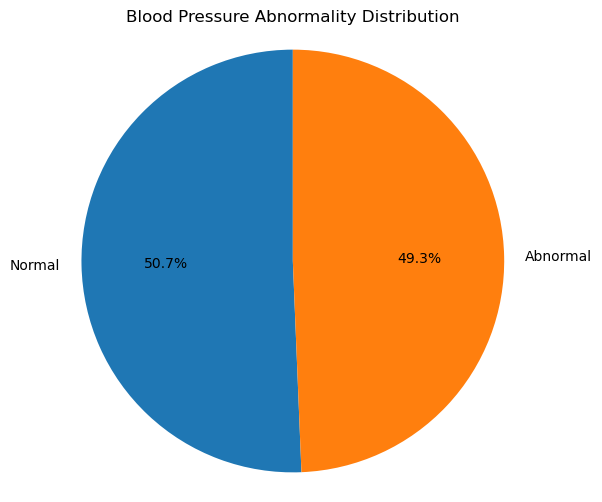

In [61]:
plt.figure(figsize=(6,6))
abnormal_counts = data['Blood_Pressure_Abnormality'].value_counts()
plt.pie(abnormal_counts, labels=['Normal', 'Abnormal'], autopct='%1.1f%%', startangle=90)
plt.title('Blood Pressure Abnormality Distribution')
plt.axis('equal')
plt.show()

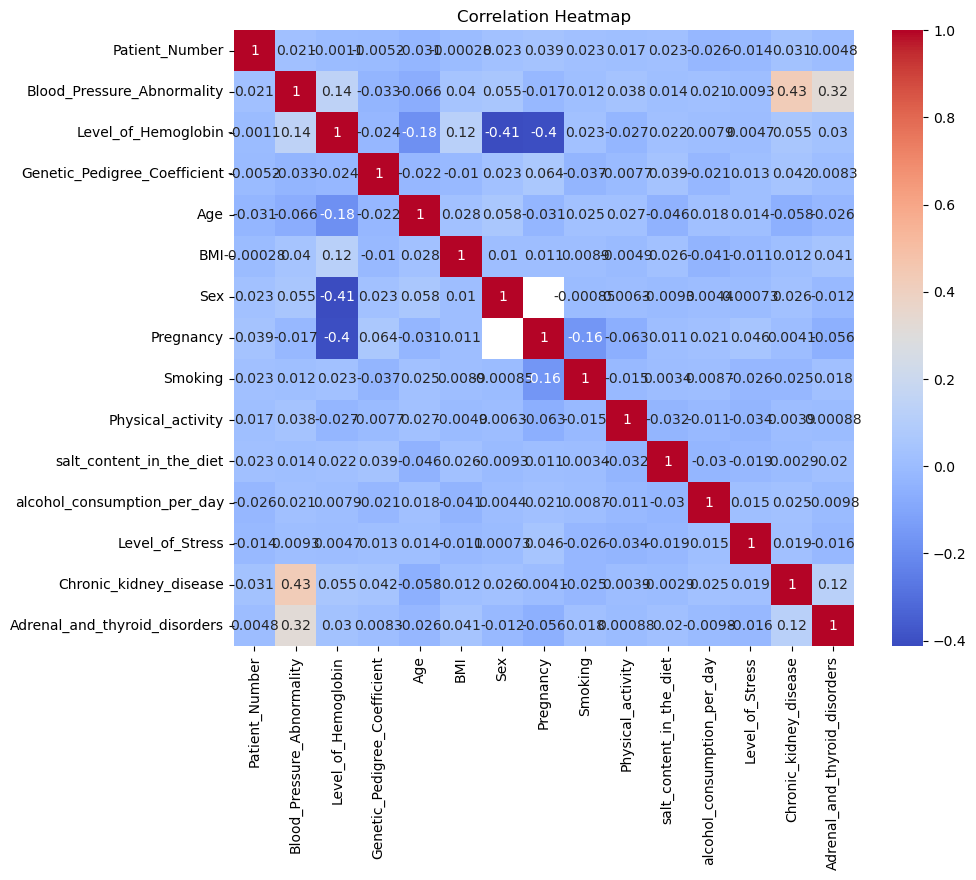

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

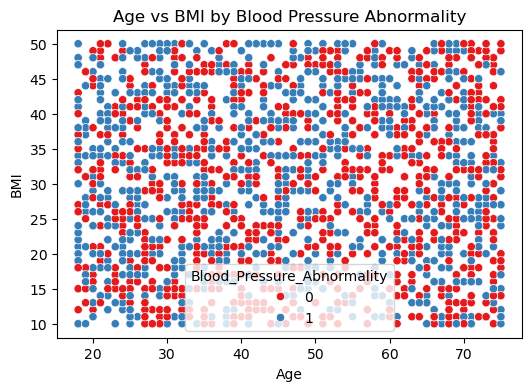

In [69]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='BMI', hue='Blood_Pressure_Abnormality', data=data, palette='Set1')
plt.title('Age vs BMI by Blood Pressure Abnormality')
plt.show()

In [161]:
X = data.drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])
y = data['Blood_Pressure_Abnormality']
y = (y > 0.5).astype(int)

In [163]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [175]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

X_train_tensor = torch.nan_to_num(X_train_tensor, nan=0.0, posinf=0.0, neginf=0.0)
X_test_tensor = torch.nan_to_num(X_test_tensor, nan=0.0, posinf=0.0, neginf=0.0)

In [179]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [181]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [183]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [205]:
class BPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)
        nn.init.xavier_uniform_(self.fc1.weight)  # 추가
        nn.init.xavier_uniform_(self.fc2.weight)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [207]:
model = BPClassifier(input_dim=X_train.shape[1])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [209]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [211]:
epochs = 50
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(1), y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 10/50, Loss: 0.7140
Epoch 20/50, Loss: 0.6356
Epoch 30/50, Loss: 0.5849
Epoch 40/50, Loss: 0.5514
Epoch 50/50, Loss: 0.5285


In [212]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = (torch.sigmoid(outputs).squeeze(1).cpu().numpy() > 0.5).astype(int)
        y_pred.extend(preds)
        y_true.extend(y_batch.cpu().numpy())

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Precision: 0.7041
Recall: 0.7797
F1 Score: 0.7399
ROC AUC: 0.7598


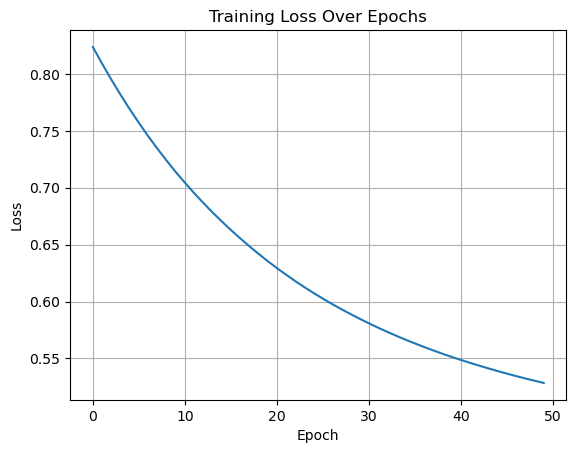

In [215]:
plt.plot(train_losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()